## Importing librarires

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.datasets as datasets

df= pd.read_excel("C:/Users/hecto/Documents/TFM/20190521_Church_Data_Ox_Diocese.xlsx")

## Visualizing the initial features

In [2]:
pd.set_option('display.max_columns', None)
df.head()

,Balkerne_Reference,Historic_England_List_Entry,Name,Address,Ecclesiastical_Unique_Key,Grade,Latitude,Longitude,OS_Grid_Reference,Search Term,Postcode,Postcode_Status,Population,Household,Index_of_Deprivation,LSOA_Name,LSOA_Code,Burglary_2018,Arson_ 2018,Tower_/_Steeple,Aisles,Porch,Quality_of_Satellite_Image,Lead_Present,Lead_on_Main_Roof,Lead_on_Tower_/_Steeple,Lead_on_Aisles,Lead_on_Porch,Lead_on_Other,Roof_Surface_Area_(m2),Lead_Surface_Area_(m2),Percentage_lead,Lead_Volume_(m3),Tonnage_of_Lead,Value of Lead at Risk,Main Roof Inclination,Aisles Inclination,Is there a parking spot for a short wheel base van,Parking Location 1 Latitude,Parking Location 1 Longitude,Parking Location 2 Latitude,Parking Location 2 Longitude,Is there an occupied building within 20m,Ease of access to lead / copper,Copper_Present,Copper_Main_Roof,Copper_Tower/Spire,Copper_Aisle,Copper_Porch,Copper_Other,Copper Surface Area (m2),Percentage Copper,Road Junction Latitude,Road Junction Longitude,Distance to Road Junction,Vulnerability Score (Lead Only),Vulnerability Score (Lead and Copper),Notes,Claims
0,Balk001,1117302.0,CHURCH OF ST PETER,"Brimpton, West Berkshire, RG7",440954,II,51.378663,-1.200637,SU5573164704,"church of st peter, Brimpton, West Berkshire, RG7",RG7 4TJ,Rural hamlet and isolated dwellings,18.0,6.0,26754,West Berkshire 011B,E01016255,6.0,13.0,1,1,1,3,0,0,0,0,0,0,355,0.0,0.0,0.0,0.0,0.0,3,3,1,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,0.0,51.395663,-1.196703,1.187221,No Lead,No Lead,NaN,0
1,Balk008,1303395.0,CHURCH OF ST MATTHEW,"Midgham, West Berkshire, RG7",626035,II,51.400927,-1.202104,SU5560267179,"church of st matthew, Midgham, West Berkshire,...",RG7 5UW,Rural hamlet and isolated dwellings,12.0,6.0,26754,West Berkshire 011B,E01016255,6.0,13.0,1,1,1,3,0,0,0,0,0,0,320,0.0,0.0,0.0,0.0,0.0,3,3,1,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,0.0,51.396344,-1.203258,0.320635,No Lead,No Lead,NaN,0
2,Balk010,1313119.0,CHURCH OF ST MARY,"Aldworth, West Berkshire, RG8",643104,I,51.510651,-1.203057,SU5540379381,"church of st mary, Aldworth, West Berkshire, R...",RG8 9SB,Rural village,26.0,10.0,28152,West Berkshire 003B,E01016257,3.0,9.0,1,1,1,3,0,0,0,0,0,0,316,0.0,0.0,0.0,0.0,0.0,3,3,1,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,0.0,51.522445,-1.148805,2.471762,No Lead,No Lead,NaN,0
3,Balk012,1289771.0,CHURCH OF ST JOHN THE EVANGELIST,"Newbury, West Berkshire, RG14",643262,II,51.395454,-1.325682,SU4701166484,"church of st john the evangelist, Newbury, Wes...",RG14 7PY,Urban city and town,37.0,15.0,25787,West Berkshire 020E,E01016320,4.0,8.0,0,1,1,3,0,0,0,0,0,0,627,0.0,0.0,0.0,0.0,0.0,3,3,1,NaN,NaN,NaN,NaN,1,2,0,0,0,0,0,0,0,0.0,51.395153,-1.325959,0.023975,No Lead,No Lead,NaN,0
4,Balk013,1135772.0,CHURCH OF ST MARY THE VIRGIN,"Burghfield, West Berkshire, RG30",643330,II,51.410628,-1.036698,SU6709468396,"church of st mary the virgin, Burghfield, West...",RG30 3TG,Rural village,35.0,12.0,25780,West Berkshire 015C,E01016269,11.0,11.0,1,1,1,3,0,0,0,0,0,0,495,0.0,0.0,0.0,0.0,0.0,3,3,1,NaN,NaN,NaN,NaN,0,2,0,0,0,0,0,0,0,0.0,51.440864,-1.049936,2.166373,No Lead,No Lead,NaN,0


In [3]:
print('Shape of the dataset:', df.shape)

Shape of the dataset: (778, 59)


In [4]:
df.keys()

Index(['Balkerne_Reference', 'Historic_England_List_Entry', 'Name', 'Address',
       'Ecclesiastical_Unique_Key', 'Grade', 'Latitude', 'Longitude',
       'OS_Grid_Reference', 'Search Term', 'Postcode', 'Postcode_Status',
       'Population', 'Household', 'Index_of_Deprivation', 'LSOA_Name',
       'LSOA_Code', 'Burglary_2018', 'Arson_ 2018', 'Tower_/_Steeple',
       'Aisles', 'Porch', 'Quality_of_Satellite_Image', 'Lead_Present',
       'Lead_on_Main_Roof', 'Lead_on_Tower_/_Steeple', 'Lead_on_Aisles',
       'Lead_on_Porch', 'Lead_on_Other', 'Roof_Surface_Area_(m2)',
       'Lead_Surface_Area_(m2)', 'Percentage_lead', 'Lead_Volume_(m3)',
       'Tonnage_of_Lead', 'Value of Lead at Risk', 'Main Roof Inclination',
       'Aisles Inclination',
       'Is there a parking spot for a short wheel base van',
       'Parking Location 1 Latitude', 'Parking Location 1 Longitude',
       'Parking Location 2 Latitude', 'Parking Location 2 Longitude',
       'Is there an occupied building within 

## Feature segmentation

In [5]:

expendable_features = ['Balkerne_Reference',
                       'Historic_England_List_Entry',
                       'Name',
                       'Address',
                       'Ecclesiastical_Unique_Key',
                       'OS_Grid_Reference',
                       'Search Term',
                       'Postcode',
                       'LSOA_Name',
                       'LSOA_Code',
                       'Parking Location 1 Latitude',
                       'Parking Location 1 Longitude',
                       'Parking Location 2 Latitude',
                       'Parking Location 2 Longitude',
                       'Road Junction Latitude',
                       'Road Junction Longitude',
                       'Vulnerability Score (Lead Only)',
                       'Vulnerability Score (Lead and Copper)',
                       'Notes']

categorical_features =  ['Grade',
                          'Postcode_Status',
                          'Tower_/_Steeple',
                          'Aisles',
                          'Porch',
                          'Quality_of_Satellite_Image',
                          'Lead_Present',
                          'Lead_on_Main_Roof',
                          'Lead_on_Aisles',
                          'Lead_on_Porch',
                          'Lead_on_Tower_/_Steeple',
                          'Lead_on_Other',
                          'Main Roof Inclination',
                          'Aisles Inclination',
                          'Is there a parking spot for a short wheel base van',
                          'Is there an occupied building within 20m',
                          'Ease of access to lead / copper',
                          'Copper_Present',
                          'Copper_Main_Roof',
                          'Copper_Aisle',
                          'Copper_Porch',
                          'Copper_Tower/Spire',
                          'Copper_Other',
                         ]
                          
                          
                          
                          
numerical_missing_values_features = ['Population',
                                     'Household',
                                     'Index_of_Deprivation',
                                     'Burglary_2018',
                                     'Arson_ 2018',
                                     'Value of Lead at Risk'
                                    ]
cathegorical_missing_values_features = ['Grade'
                                    ]                          
                           
#SUGGESTION: Take the last work out of "LSOA Name" feature to make it usable

## Feature selection

In [6]:

for unusable_feature in expendable_features:
    df = df.drop([unusable_feature], axis=1)
    print ("Dropped feature: ", unusable_feature)


Dropped feature:  Balkerne_Reference
Dropped feature:  Historic_England_List_Entry
Dropped feature:  Name
Dropped feature:  Address
Dropped feature:  Ecclesiastical_Unique_Key
Dropped feature:  OS_Grid_Reference
Dropped feature:  Search Term
Dropped feature:  Postcode
Dropped feature:  LSOA_Name
Dropped feature:  LSOA_Code
Dropped feature:  Parking Location 1 Latitude
Dropped feature:  Parking Location 1 Longitude
Dropped feature:  Parking Location 2 Latitude
Dropped feature:  Parking Location 2 Longitude
Dropped feature:  Road Junction Latitude
Dropped feature:  Road Junction Longitude
Dropped feature:  Vulnerability Score (Lead Only)
Dropped feature:  Vulnerability Score (Lead and Copper)
Dropped feature:  Notes


In [7]:
for missing_feature in numerical_missing_values_features:
    missCount = 0
    for indexDF, rowDF in df.iterrows():
        if (pd.isnull(df.at[indexDF, missing_feature])):
            mu = np.mean(df[missing_feature])
            sigma = np.std(df[missing_feature])
            df.at[indexDF,missing_feature] = np.random.normal(loc=mu, scale=sigma)
            missCount = missCount + 1
    print("Replaced", missCount, "values in", missing_feature) 

Replaced 49 values in Population
Replaced 49 values in Household
Replaced 0 values in Index_of_Deprivation
Replaced 4 values in Burglary_2018
Replaced 4 values in Arson_ 2018
Replaced 1 values in Value of Lead at Risk


In [8]:
for m_s_v_feature in cathegorical_missing_values_features:
    for indexDF, rowDF in df.iterrows():
        if (pd.isnull(df.at[indexDF, m_s_v_feature])):
            df.at[indexDF,m_s_v_feature] = 'Other'
    print("Fixed missing values in: ", m_s_v_feature)

Fixed missing values in:  Grade


In [9]:
# for cat_feature in categorical_features:
#     df[cat_feature] = pd.Categorical(df[cat_feature])
#     one_hot[cat_feature] = pd.get_dummies(df[cat_feature], prefix = cat_feature)
#     df = df.drop(cat_feature, axis = 1)
#     df = df.join(one_hot)
#     print (cat_feature, ' made categorical')


# for cat_feature in categorical_features:
#     df[cat_feature] = pd.Categorical(df[cat_feature])
   

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

for cat_feature in categorical_features:
    dummies = pd.get_dummies(df[cat_feature], prefix=cat_feature)
    df = pd.concat([df, dummies], axis=1)
    print ("Encoded categorical feature: ", cat_feature)
for cat_feature in categorical_features:
    df = df.drop([cat_feature], axis=1)




Encoded categorical feature:  Grade
Encoded categorical feature:  Postcode_Status
Encoded categorical feature:  Tower_/_Steeple
Encoded categorical feature:  Aisles
Encoded categorical feature:  Porch
Encoded categorical feature:  Quality_of_Satellite_Image
Encoded categorical feature:  Lead_Present
Encoded categorical feature:  Lead_on_Main_Roof
Encoded categorical feature:  Lead_on_Aisles
Encoded categorical feature:  Lead_on_Porch
Encoded categorical feature:  Lead_on_Tower_/_Steeple
Encoded categorical feature:  Lead_on_Other
Encoded categorical feature:  Main Roof Inclination
Encoded categorical feature:  Aisles Inclination
Encoded categorical feature:  Is there a parking spot for a short wheel base van
Encoded categorical feature:  Is there an occupied building within 20m
Encoded categorical feature:  Ease of access to lead / copper
Encoded categorical feature:  Copper_Present
Encoded categorical feature:  Copper_Main_Roof
Encoded categorical feature:  Copper_Aisle
Encoded catego

## New feature visualisation

In [10]:
df.head(20)

,Latitude,Longitude,Population,Household,Index_of_Deprivation,Burglary_2018,Arson_ 2018,Roof_Surface_Area_(m2),Lead_Surface_Area_(m2),Percentage_lead,Lead_Volume_(m3),Tonnage_of_Lead,Value of Lead at Risk,Copper Surface Area (m2),Percentage Copper,Distance to Road Junction,Claims,Grade_I,Grade_II,Grade_II*,Grade_Other,Postcode_Status_Rural hamlet and isolated dwellings,Postcode_Status_Rural town and fringe,Postcode_Status_Rural village,Postcode_Status_Urban city and town,Tower_/_Steeple_0,Tower_/_Steeple_1,Aisles_0,Aisles_1,Porch_0,Porch_1,Quality_of_Satellite_Image_2,Quality_of_Satellite_Image_3,Lead_Present_0,Lead_Present_1,Lead_on_Main_Roof_0,Lead_on_Main_Roof_1,Lead_on_Aisles_0,Lead_on_Aisles_1,Lead_on_Porch_0,Lead_on_Porch_1,Lead_on_Tower_/_Steeple_0,Lead_on_Tower_/_Steeple_1,Lead_on_Other_0,Lead_on_Other_1,Main Roof Inclination_1,Main Roof Inclination_2,Main Roof Inclination_3,Aisles Inclination_0,Aisles Inclination_1,Aisles Inclination_2,Aisles Inclination_3,Is there a parking spot for a short wheel base van_0,Is there a parking spot for a short wheel base van_1,Is there a parking spot for a short wheel base van_2,Is there a parking spot for a short wheel base van_3,Is there an occupied building within 20m_0,Is there an occupied building within 20m_1,Ease of access to lead / copper_0,Ease of access to lead / copper_1,Ease of access to lead / copper_2,Copper_Present_0,Copper_Present_1,Copper_Main_Roof_0,Copper_Main_Roof_1,Copper_Aisle_0,Copper_Aisle_1,Copper_Porch_0,Copper_Porch_1,Copper_Tower/Spire_0,Copper_Tower/Spire_1,Copper_Other_0,Copper_Other_1
0,51.378663,-1.200637,18.000000,6.000000,26754,6.0,13.0,355,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,1.187221,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
1,51.400927,-1.202104,12.000000,6.000000,26754,6.0,13.0,320,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,0.320635,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
2,51.510651,-1.203057,26.000000,10.000000,28152,3.0,9.0,316,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,2.471762,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
3,51.395454,-1.325682,37.000000,15.000000,25787,4.0,8.0,627,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,0.023975,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
4,51.410628,-1.036698,35.000000,12.000000,25780,11.0,11.0,495,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,2.166373,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
5,51.406909,-1.073985,22.000000,7.000000,18889,11.0,25.0,215,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,1.709959,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
6,51.374583,-1.173871,8.000000,5.000000,26754,6.0,13.0,205,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,0.967673,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
7,51.490812,-1.341705,5.000000,1.000000,19814,14.0,7.0,271,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,1.852495,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
8,51.441407,-1.173313,57.000000,26.000000,22456,4.0,0.0,192,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,2.915093,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
9,51.380701,-1.144218,57.969775,30.829962,18744,30.0,37.0,383,0.0000,0.0000,0.0000,0.0,0.0,0,0.0,0.349738,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [11]:
print ("New shape of the datset:", df.shape)
df.keys()

New shape of the datset: (778, 73)


Index(['Latitude', 'Longitude', 'Population', 'Household',
       'Index_of_Deprivation', 'Burglary_2018', 'Arson_ 2018',
       'Roof_Surface_Area_(m2)', 'Lead_Surface_Area_(m2)', 'Percentage_lead',
       'Lead_Volume_(m3)', 'Tonnage_of_Lead', 'Value of Lead at Risk',
       'Copper Surface Area (m2)', 'Percentage Copper',
       'Distance to Road Junction', 'Claims', 'Grade_I', 'Grade_II',
       'Grade_II*', 'Grade_Other',
       'Postcode_Status_Rural hamlet and isolated dwellings',
       'Postcode_Status_Rural town and fringe',
       'Postcode_Status_Rural village', 'Postcode_Status_Urban city and town',
       'Tower_/_Steeple_0', 'Tower_/_Steeple_1', 'Aisles_0', 'Aisles_1',
       'Porch_0', 'Porch_1', 'Quality_of_Satellite_Image_2',
       'Quality_of_Satellite_Image_3', 'Lead_Present_0', 'Lead_Present_1',
       'Lead_on_Main_Roof_0', 'Lead_on_Main_Roof_1', 'Lead_on_Aisles_0',
       'Lead_on_Aisles_1', 'Lead_on_Porch_0', 'Lead_on_Porch_1',
       'Lead_on_Tower_/_Steeple_0

## Class adjustment

In [12]:
for feature in df.keys():
    for indexDF, rowDF in df.iterrows():
        if np.isnan(df.at[indexDF, feature]):
            print("Found: ", indexDF, feature)
print ('END')

END


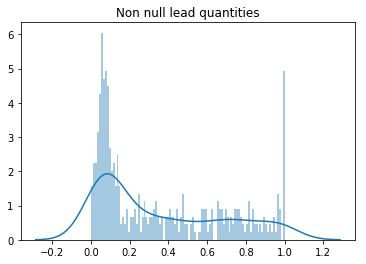

In [13]:
# df[df.columns[1:]].mean().plot('hist');
lead_quants=[]
for quant in df['Percentage_lead']:
    if (quant != 0):
        lead_quants.append(quant)
sns.distplot(lead_quants, bins=100);
plt.title('Non null lead quantities');

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)


## Train-test splits

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import shuffle

# fix random seed for reproducibility
np.random.seed(7)

index = df.index
df = shuffle(df)
df.index = index

Y = np.array(df['Claims'])
X = np.array(df.drop(['Claims'],1))
X_PCA = pca.fit_transform(X)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_PCA,Y,test_size=0.3, stratify=Y)

## Defining metrics

In [16]:
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def sensitivity_loss(y_pred, y_true):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    tp = K.sum(y_true * y_pred)
    fn = K.sum(y_true * neg_y_pred)
    sensitivity = tp / (tp + fn + K.epsilon())
    return sensitivity

def specificity_loss(y_pred, y_true):
    """
    param:
    y_pred - Predicted labels
    y_true - True labels 
    Returns:
    Specificity score
    """
    neg_y_true = 1 - y_true
    neg_y_pred = 1 - y_pred
    fp = K.sum(neg_y_true * y_pred)
    tn = K.sum(neg_y_true * neg_y_pred)
    specificity = tn / (tn + fp + K.epsilon())
    return specificity

## Class weights

(To make for the class skew)

In [17]:
class_outs = df.groupby('Claims').size()
print(class_outs)
class_ratio = class_outs[0]/class_outs[1]
print ('Class ratio is 1 to %.2f' %(class_ratio))
class_weights = {False: 1.,
                True: class_ratio}

Claims
0    730
1     48
dtype: int64
Class ratio is 1 to 15.21


## MLP witout PCA

Train on 622 samples, validate on 156 samples
Epoch 1/20
622/622 [==============================] - 1s 1ms/step - loss: 3.4160 - sensitivity: 0.0322 - acc: 0.9228 - val_loss: 0.4513 - val_sensitivity: 0.0000e+00 - val_acc: 0.9231
Epoch 2/20
622/622 [==============================] - 0s 117us/step - loss: 2.9240 - sensitivity: 0.5059 - acc: 0.8232 - val_loss: 0.5338 - val_sensitivity: 0.7500 - val_acc: 0.8077
Epoch 3/20
622/622 [==============================] - 0s 117us/step - loss: 1.5026 - sensitivity: 0.7299 - acc: 0.7524 - val_loss: 0.9028 - val_sensitivity: 0.7500 - val_acc: 0.8077
Epoch 4/20
622/622 [==============================] - 0s 128us/step - loss: 1.5440 - sensitivity: 0.6688 - acc: 0.7524 - val_loss: 0.8149 - val_sensitivity: 0.7500 - val_acc: 0.8077
Epoch 5/20
622/622 [==============================] - 0s 111us/step - loss: 1.4852 - sensitivity: 0.7340 - acc: 0.7524 - val_loss: 0.7149 - val_sensitivity: 0.7500 - val_acc: 0.8077
Epoch 6/20
622/622 [======================

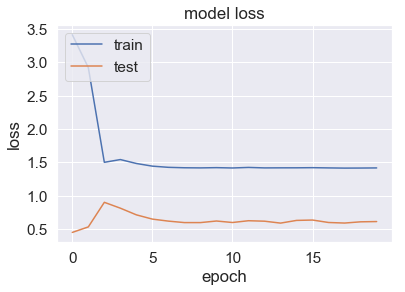

156/156 [==============================] - 0s 64us/step

 Training sensitivity :  74.16934415075174 %

 Validation sensitivity :  74.99999755468124 %
 -> Confusion Matrix: 
 [[117  29]
 [  1   9]]


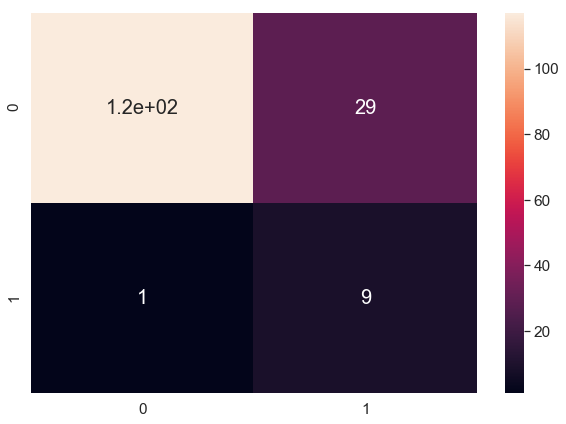

In [32]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.layers import Input,Dense
from keras.models import Model,Sequential
import seaborn as sn

# fix random seed for reproducibility
np.random.seed(62) 
#1:35 2
#2:35 13 smooth
#2:36 26 interesting
#1:43 27 
#2:37 31 smooth
#2:30 37
#1:29 44 smooth
#1:28 62
#1:24 76
#0:29 94
#0:26 96

pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_PCA,Y,test_size=0.2, stratify=Y)

# split into input (X) and output (Y) variables
input_dim=X_train.shape[1]
output_dim=Y_train.ndim
# create model
model = Sequential()
model.add(Dense(4,  input_shape=(input_dim,),  activation='sigmoid')) #sigmoid
model.add(Dense(output_dim, activation='relu'))

sgd = keras.optimizers.SGD(lr=0.0002, momentum=0.9)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=[sensitivity, 'accuracy'])
# Early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
# Fit the model
history = model.fit(x = X_train, y = Y_train,
                    epochs=20, 
                    class_weight=class_weights,
#                  batch_size=10,
                    shuffle=True,
#                 callbacks=callbacks,
                    validation_data=(X_test, Y_test))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
Tra_scores = model.evaluate(X_train, Y_train)
Val_scores = model.evaluate(X_test, Y_test)
tra_accuracy = Tra_scores[1]*100
val_accuracy = Val_scores[1]*100
accuracy_name = model.metrics_names[1]
print('\n Training', accuracy_name, ': ', tra_accuracy, '%')
print('\n Validation', accuracy_name, ': ', val_accuracy, '%')


# Y_pred = model.predict(X_test)
# print (" -> Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
# print(" -> Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
# print(" -> Classification report: \n", classification_report(Y_test, Y_pred))
# print (" -> Kappa Statistic: ", metrics.cohen_kappa_score(Y_test, Y_pred))


y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)
y_test=Y_test.tolist()

matrix = confusion_matrix(y_test, y_pred)
print(" -> Confusion Matrix: \n", matrix)

df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size

## MLP with PCA

Train on 622 samples, validate on 156 samples
Epoch 1/20
622/622 [==============================] - 1s 1ms/step - loss: 4.3002 - sensitivity: 0.2797 - acc: 0.8682 - val_loss: 0.2214 - val_sensitivity: 1.0000 - val_acc: 0.8205
Epoch 2/20
622/622 [==============================] - 0s 119us/step - loss: 3.3423 - sensitivity: 0.5884 - acc: 0.7621 - val_loss: 0.3089 - val_sensitivity: 1.0000 - val_acc: 0.8205
Epoch 3/20
622/622 [==============================] - 0s 122us/step - loss: 3.3250 - sensitivity: 0.6999 - acc: 0.7621 - val_loss: 0.3137 - val_sensitivity: 1.0000 - val_acc: 0.8205
Epoch 4/20
622/622 [==============================] - 0s 122us/step - loss: 3.3240 - sensitivity: 0.7100 - acc: 0.7621 - val_loss: 0.3149 - val_sensitivity: 1.0000 - val_acc: 0.8205
Epoch 5/20
622/622 [==============================] - 0s 111us/step - loss: 3.3236 - sensitivity: 0.5968 - acc: 0.7621 - val_loss: 0.3002 - val_sensitivity: 1.0000 - val_acc: 0.8205
Epoch 6/20
622/622 [==========================

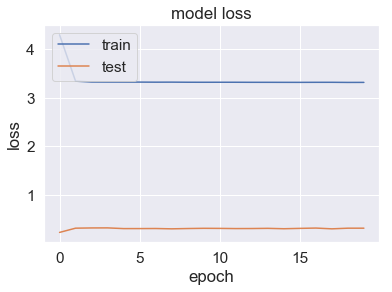

156/156 [==============================] - 0s 58us/step

 Training sensitivity :  61.50053490396481 %

 Validation sensitivity :  99.99999541502731 %
 -> Confusion Matrix: 
 [[118  28]
 [  0  10]]
TP = 118


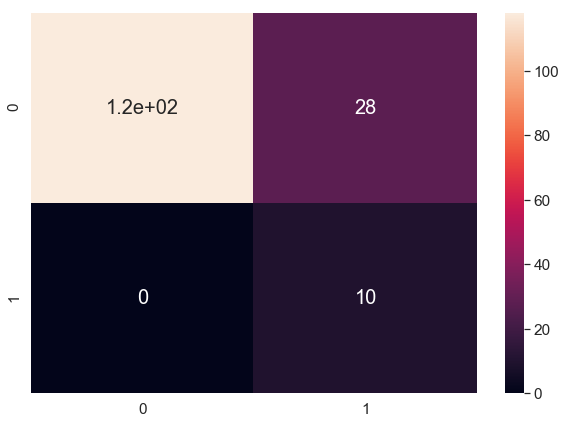

In [34]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.layers import Input,Dense
from keras.models import Model,Sequential
import seaborn as sn

Seed_PCA72_h2=11
Seed_PCA72_h4=29
Seed_PCA10_h4=96
Seed_PCA10_h2=96
Seed_PCA20_h4=54
Seed_PCA45_h4=35
Seed_PCA30_h4=60

np.random.seed(60) 


pca = PCA(n_components=30)
X_PCA = pca.fit_transform(X)
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

X_train, X_test, Y_train, Y_test = train_test_split(X_PCA,Y,test_size=0.2, stratify=Y)

# split into input (X) and output (Y) variables
input_dim=X_train.shape[1]
output_dim=Y_train.ndim
# create model
model = Sequential()
model.add(Dense(4,  input_shape=(input_dim,),  activation='sigmoid')) #sigmoid
model.add(Dense(output_dim, activation='relu'))

sgd = keras.optimizers.SGD(lr=0.0002, momentum=0.9)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=[sensitivity, 'accuracy'])
# Early stopping
#     callbacks = [EarlyStopping(monitor='val_loss', patience=5),
#                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
# Fit the model
history = model.fit(x = X_train, y = Y_train,
                    epochs=20, 
                    class_weight=class_weights,
#                  batch_size=10,
                    shuffle=True,
#                 callbacks=callbacks,
                    validation_data=(X_test, Y_test))



# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
Tra_scores = model.evaluate(X_train, Y_train)
Val_scores = model.evaluate(X_test, Y_test)
tra_accuracy = Tra_scores[1]*100
val_accuracy = Val_scores[1]*100
accuracy_name = model.metrics_names[1]
print('\n Training', accuracy_name, ': ', tra_accuracy, '%')
print('\n Validation', accuracy_name, ': ', val_accuracy, '%')



# Y_pred = model.predict(X_test)
# print (" -> Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
# print(" -> Confusion Matrix: \n", confusion_matrix(Y_test, Y_pred))
# print(" -> Classification report: \n", classification_report(Y_test, Y_pred))
# print (" -> Kappa Statistic: ", metrics.cohen_kappa_score(Y_test, Y_pred))


y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)
y_test=Y_test.tolist()

matrix = confusion_matrix(y_test, y_pred)
print(" -> Confusion Matrix: \n", matrix)
print('TP =', matrix[0][0])

df_cm = pd.DataFrame(matrix, range(2), range(2))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size

## Gridsearch SVM with PCA

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfnorm = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)

np.random.seed(7) 
index = df.index
dfnorm = shuffle(dfnorm)
dfnorm.index = index
tsize = 0.2

sss = StratifiedShuffleSplit(n_splits=5, test_size=tsize, random_state=0)

pca = PCA(n_components=45)
X_PCA = pca.fit_transform(dfnorm.drop(['Claims'],1))
Ynorm = np.array(dfnorm['Claims'])
Xnorm = np.array(X_PCA)



Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xnorm,Ynorm,test_size=tsize, stratify=Ynorm)

print(np.unique(Yn_test, return_counts=True))
print(dfnorm.drop(['Claims'],1).shape)
print(Xn_train.shape)


(array([0., 1.]), array([146,  10], dtype=int64))
(778, 72)
(622, 45)


In [22]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.datasets as datasets
import pandas as pd
import numpy as np


# #SVM predictor
# clf = svm.SVC(gamma=0.014, C=20.69) #PCA = 52
# clf.fit(X_train, Y_train.astype('int'))
# Y_pred = clf.predict(X_test)

# print(" -> Confusion Matrix: \n", confusion_matrix(Y_test.astype('int'), Y_pred.astype('int')))
# print(" -> Classification report: \n", classification_report(Yn_test.astype('int'), Yn_pred.astype('int')))


#  Split the dataset in two equal parts
clf = svm.SVC(kernel = 'rbf',class_weight='balanced') #linear
Cs = np.logspace(-1, 3, 20)
Gs = np.logspace(-4, 1, 20)
clf = GridSearchCV(estimator=clf, param_grid=dict(C=Cs, gamma=Gs), n_jobs=-1)
clf.fit(Xn_train, Yn_train.astype('int'))
Yn_pred = clf.predict(Xn_test)

print('Best C:', clf.best_estimator_.C, 'Best gamma:', clf.best_estimator_.gamma)
print(" -> Confusion Matrix: \n", confusion_matrix(Yn_test.astype('int'), Yn_pred.astype('int')))
print(" -> Classification report: \n", classification_report(Yn_test.astype('int'), Yn_pred.astype('int')))
# print(" -> Hyperparam:")
# clf.get_params()


C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best C: 0.1 Best gamma: 0.8858667904100823
 -> Confusion Matrix: 
 [[62 84]
 [ 0 10]]
 -> Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.42      0.60       146
           1       0.11      1.00      0.19        10

   micro avg       0.46      0.46      0.46       156
   macro avg       0.55      0.71      0.39       156
weighted avg       0.94      0.46      0.57       156



C:\Users\hecto\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Feature importance

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from keras.layers import Input,Dense
from keras.models import Model,Sequential

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

np.random.seed(62) 

# split into input (X) and output (Y) variables
input_dim=X_train.shape[1]
output_dim=Y_train.ndim

def base_model():
    model = Sequential()
    model.add(Dense(4,  input_shape=(input_dim,),  activation='sigmoid')) #sigmoid
    model.add(Dense(output_dim, activation='relu'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[sensitivity, 'accuracy'])
    return model

nn_model = KerasRegressor(build_fn=base_model)

sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9)


# Early stopping
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
# Fit the model
nn_model.fit(x = X_train, y = Y_train,
                    epochs=10, 
                    class_weight=class_weights,
#                  batch_size=256,
                    shuffle=True,
#                 callbacks=callbacks,
                    validation_data=(X_test, Y_test))

perm = PermutationImportance(nn_model, random_state=1).fit(X_train, Y_train)
eli5.show_weights(perm)

Train on 622 samples, validate on 156 samples
Epoch 1/10
622/622 [==============================] - 1s 2ms/step - loss: 3.9665 - sensitivity: 0.0000e+00 - acc: 0.9389 - val_loss: 0.1442 - val_sensitivity: 0.0000e+00 - val_acc: 0.9359
Epoch 2/10
622/622 [==============================] - 0s 276us/step - loss: 3.8512 - sensitivity: 0.0000e+00 - acc: 0.9389 - val_loss: 0.1449 - val_sensitivity: 0.0000e+00 - val_acc: 0.9359
Epoch 3/10
622/622 [==============================] - 0s 281us/step - loss: 3.7541 - sensitivity: 0.0000e+00 - acc: 0.9389 - val_loss: 0.1472 - val_sensitivity: 0.0000e+00 - val_acc: 0.9359
Epoch 4/10
622/622 [==============================] - 0s 241us/step - loss: 3.6793 - sensitivity: 0.0000e+00 - acc: 0.9389 - val_loss: 0.1506 - val_sensitivity: 0.0000e+00 - val_acc: 0.9359
Epoch 5/10
622/622 [==============================] - 0s 290us/step - loss: 3.6209 - sensitivity: 0.0000e+00 - acc: 0.9389 - val_loss: 0.1548 - val_sensitivity: 0.0000e+00 - val_acc: 0.9359
Epoch 

Weight,Feature
0.5649 ± 0.0771,x0
0.0019 ± 0.0158,x1
0 ± 0.0000,x4
0 ± 0.0000,x5
0 ± 0.0000,x6
0 ± 0.0000,x7
0 ± 0.0000,x8
0 ± 0.0000,x9
0 ± 0.0000,x10
0 ± 0.0000,x11
